# ***Text Analytics of Azerbaijani blogs***

In this notebook, we explore the text corpus containing 50 documents. The documents contains azerbaijani blogs and are scrached from webstie kayzen.az by aznlp.

*Dataset can be found at:
Reference [https://huggingface.co/datasets/aznlp/azerbaijani-blogs?library=true]*

# Loading data and required libraries

Let's start by suppressing the wranings

In [1]:

suppressPackageStartupMessages({
  library(tm)
  library(tidyverse)
  library(wordcloud)
  library(RColorBrewer)
  library(syuzhet)

})


In [2]:
# metapackage of all tidyverse packages
library(tidyverse)

list.files(path = "../input/azerbaijani-blogs")

[1] "azerbaijani_blogs.csv" "stopwords-az.txt"

In [3]:
file_path <- '../input/azerbaijani-blogs/azerbaijani_blogs.csv'

# Read the CSV file into a data frame
df <- read.csv(file_path, header = TRUE, encoding = 'UTF-8')

# Subset the dataframe to keep only the first half
df_fifty <- df[1:50, ]

# Showing the last row of the new dataframe
tail(df_fifty, 1)


Unnamed..0
50 49        
   url                                                                                                                         
50 https://kayzen.az/blog/politologiya/27776/ssri-1960-c%C4%B1-ill%C9%99rin-ikinci-yarisi-1980-ci-ill%C9%99rin-ortalarinda.html
   title                                                            author
50  SSRİ 1960-cı İLLƏRİN İKİNCİ YARISI -1980-ci İLLƏRİN ORTALARINDA gunelb
   category              date                 
50 Tarix və politologiya 28 fevral 2023, 00:10
   content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

#### Let's check the dataset length and make sure it fits the requirments in terms of size:

In [4]:
# Split the text into words for each row in the 'content' column
words_list <- lapply(df_fifty$content, function(text) {
  unlist(strsplit(text, "\\s+"))  # Split text by whitespace
})

# Count the number of words in each row
word_counts <- sapply(words_list, length)

# Sum the word counts to get the total number of words in the 'content' column
total_word_count <- sum(word_counts)

# Display the total number of words
cat("Total Word Count:", total_word_count, "\n")



Total Word Count: 58387 


# A. Prior to removing the punctuation, find the 10 longest words and 10 longest sentences in each document. Prepare a table of this data as well as showing these items.
 

In [5]:
library(tm)

# Create a VCorpus from the content column
corpus <- VCorpus(VectorSource(df_fifty$content))


In [6]:
library(tm)
library(stringr)
library(dplyr)

# Assuming df_fifty$content contains the text data and is already loaded

# Create the VCorpus
corpus <- VCorpus(VectorSource(df_fifty$content))

# Function to find the longest words and sentences
analyze_text <- function(doc) {
  # Convert to plain text
  text <- as.character(content(doc))
  
  # Find words and sentences
  words <- unlist(str_extract_all(text, "\\b\\w+\\b"))
  sentences <- unlist(str_extract_all(text, "[^.!?]+[.!?]"))
  
  # Sort and find the longest
  top_words <- words[order(nchar(words), decreasing = TRUE)][1:10]
  top_sentences <- sentences[order(nchar(sentences), decreasing = TRUE)][1:10]
  
  # Return as a list
  return(list(words = top_words, sentences = top_sentences))
}

# Apply the function to each document in the corpus
results <- lapply(corpus, analyze_text)

# Create a data frame for easy viewing and analysis
results_df <- do.call(rbind, lapply(1:length(results), function(i) {
  data.frame(doc_id = i,
             longest_words = I(list(results[[i]]$words)),
             longest_sentences = I(list(results[[i]]$sentences)))
}))

# Print the results
head(results_df)


,doc_id,longest_words,longest_sentences
,<int>,<I<list>>,<I<list>>
1,1,öyrənilm....,Özünüink....
2,2,dəqiqləş....,Bunun ü....
3,3,minnətda....,Psixolo....
4,4,SİMVOLUB....,DÜNYADA....
5,5,nümunələ....,Böyük M....
6,6,mütəxəss....,Rəqəmsa....


In [7]:
# Print 10 the longest words and sentences of the first document
print(results_df$longest_words[[1]])
print(results_df$longest_sentences[[1]])


 [1] "öyrənilməsiProqramlaşdırma" "platformalarıİnteraktiv"   
 [3] "tələbləriProqramçılıqda"    "inkişafıProqramçılıqda"    
 [5] "seçimiProqramlaşdırma"      "istifadəProqramçılığı"     
 [7] "mentorluqProqramçılıq"      "yollarıProqramçılığı"      
 [9] "izləməkProqramçılıq"        "seminarlarTexnoloji"       
 [1] "Özünüinkişaf və onlayn resurslardan istifadəProqramçılığı öyrənmək üçün onlayn resurslardan istifadə etmək, xüsusilə müstəqil öyrənməni sevənlər üçün əla bir yol ola bilər."
 [2] "Texnoloji konfranslar və seminarlarTexnoloji konfranslar və seminarlar yeni trendlər və texnologiyalar haqqında bilik əldə etmək üçün əla imkanlar yaradır."                 
 [3] " Codecademy, FreeCodeCamp və Khan Academy kimi saytlar müxtəlif proqramlaşdırma dillərini və texnologiyalarını öyrənmək üçün geniş imkanlar təqdim edir."                    
 [4] "Proqramlaşdırma dillərinin öyrənilməsiProqramlaşdırma dillərini öyrənmək üçün onlayn resurslardan, kitablardan və kurslardan istifadə edə b

 Analyzing longest 10 words from first document reveals that they are combination of words rather than one word. As expected, the spelling mistaked are one of the challanging parts of text analytics.

Fortunately, this does not happen in all of the documents

In [8]:
# Print 10 the longest words and sentences of the third document
print(results_df$longest_words[[3]])
print(results_df$longest_sentences[[3]])

 [1] "minnətdarsınız" "Həyatınızdakı"  "nailiyyətiniz"  "Uşaqlığınızda" 
 [5] "xarakterinin"   "öyrəndiyiniz"   "istərdinizmi"   "dəyişərdiniz"  
 [9] "qabiliyyətlə"   "dəyişərdiniz"  
 [1] " Psixoloji suallar ilə insanın həyatdakı dəyərləri, sevdiyi və sevmədiyi şeylər, xarakterinin gizli və qaranlıq tərəfləri barədə ətraflı məlumat toplamış olacaqsız."
 [2] " Bir kristal kürə sizə həyatınız, gələcəyiniz və ya başqa bir şey haqqında həqiqəti söyləyə bilsəydi, nəyi bilmək istərdiniz?"                                       
 [3] " 90 yaşına qədər yaşaya bilsəydiniz, son 60 ilini 30 yaşlı ağlınızla keçirməyi üstün tutursunuz, yoxsa 30 yaşlı bədəninizlə?"                                        
 [4] " Sevdiyiniz insanları və heyvanları xilas etdikdən sonra bir şeyi götürə bilsəniz, bu nə olardı?"                                                                    
 [5] " Dünyadakı istədiyin hər hansı bir insanı şam yeməyinə dəvət etmə şansınız olsa, bu kim olardı?"                         

# B. Dataset's ready, we can apply all steps in Text_Analytics tutorial

In [9]:
# Displaying the 49th document from corpus
str(corpus[49])


List of 1
 $ 49:List of 2
  ..$ content: chr "\nBir mədəniyyəti yox etmək üçün kitabları yandırmağa gərək yoxdur. Oxumağın qarşısını alın, yetər (R.Bredberi)"| __truncated__
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2024-05-05 20:16:34"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "49"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 - attr(*, "class")= chr [1:2] "VCorpus" "Corpus"


In [10]:
# If we print it, we get following information about our corpus:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 50

In [11]:
# extracting text
ctext <- corpus[[1]]
ctext

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 5196

Text contains 5196 chars, to see the content:

In [12]:
ctext[1]

$content
[1] "\nProqramçılığa başlamaq üçün ilk addım bu sahənin əsasları ilə tanış olmaqdır. Kompüter elmləri alqoritmlər, verilənlər strukturları və proqramlaşdırma prinsipləri ilə tanışlıq proqramçı kimi inkişafınızda əsas təşkil edəcək. Bu mərhələdə Python, JavaScript və Java kimi başlanğıc səviyyəli proqramlaşdırma dillərini öyrənmək lazımdır. \n\n\n\n\n\nProqramlaşdırma dillərinin seçimiProqramlaşdırma dilləri kompüterlərlə işləmək üçün istifadə olunan dillərdir. Hər bir proqramlaşdırma dili xüsusi tətbiqlər və sahələr üçün yaradılmışdır. Məsələn, veb inkişaf üçün JavaScript, mobil tətbiqetmələr üçün Swift və ya Kotlin, məlumat elmləri üçün Python kimi dilləri öyrənmək faydalıdır. Bu dillər arasında seçim etmək üçün maraqlandığınız sahə və layihələrə əsaslanaraq qərar verə bilərsiniz.Proqramlaşdırma dillərinin öyrənilməsiProqramlaşdırma dillərini öyrənmək üçün onlayn resurslardan, kitablardan və kurslardan istifadə edə bilərsiniz. Öyrənmə prosesində praktiki məşqlərə xüsusi diqqət yetirmək lazımdır. Məsələn, Python ilə başlayarkən sadə skriptlər yazmaq və kiçik layihələr üzərində işləmək dilin əsaslarını anlamağa kömək edəcək.İlk layihələriniz sadə və kiçik olmalıdır. Məsələn, bir hesab maşını, sadə bir oyun və ya istifadəçi girişi ilə işləyən bir veb tətbiqi hazırlaya bilərsiniz. Bu layihələr vasitəsilə proqramlaşdırma dillərinin sintaksisi və funksiyaları ilə daha yaxından tanış olacaqsınız.Proqramçılıqda təhsil və öyrənmə yollarıProqramçılığı öyrənmək üçün bir çox yol mövcuddur: təhsil, onlayn kurslar, özünüinkişaf və iş təcrübəsi. Rəsmi təhsil universitetlərdə kompüter elmləri və ya proqramlaşdırma ilə əlaqədar ixtisaslar alaraq həyata keçirilə bilər. Onlayn kurslar isə evdən rahat bir şəkildə proqramlaşdırma öyrənməyə imkan verir. Udemy, Coursera və Code academy kimi platformalar müxtəlif proqramlaşdırma dilləri üzrə kurslar təklif edir.Özünüinkişaf və onlayn resurslardan istifadəProqramçılığı öyrənmək üçün onlayn resurslardan istifadə etmək, xüsusilə müstəqil öyrənməni sevənlər üçün əla bir yol ola bilər. GitHub, Stack Overflow və Reddit kimi platformalarda mövcud layihələr və müzakirələr vasitəsilə dəyərli biliklər və təcrübələr əldə etmək mümkündür. Özünüinkişaf prosesində müxtəlif qaynaqlardan istifadə edərək öyrəndiklərinizi praktikada tətbiq etmək vacibdir.İnteraktiv öyrənmə platformalarıİnteraktiv öyrənmə platformaları proqramlaşdırma bacarıqlarınızı inkişaf etdirmək üçün yaxşı bir seçimdir. Bu platformalar, təlimatlar və məşqlər vasitəsilə öyrənmə prosesini daha maraqlı və interaktiv edir. Codecademy, FreeCodeCamp və Khan Academy kimi saytlar müxtəlif proqramlaşdırma dillərini və texnologiyalarını öyrənmək üçün geniş imkanlar təqdim edir.İş təcrübəsi və stajReal iş təcrübəsi əldə etmək, öyrəndiklərinizi tətbiq etmək və peşəkar aləmdə öz yerinizi tapmaq üçün əvəzsizdir. Staj və təcrübə proqramları yeni başlayan proqramçılar üçün əla imkanlar yarada bilər. Bu proqramlar vasitəsilə real layihələr üzərində işləmək, peşəkar bir mühitdə təcrübə qazanmaq və sahə standartları ilə tanış olmaq mümkündür.Proqramçılığın əsas tələbləriProqramçılıqda uğur qazanmaq üçün yalnız texniki biliklər kifayət deyil. Problem həll etmə, loqik düşüncə, daimi öyrənmə və yeniliklərə adaptasiya olmaq kimi bacarıqlar da çox vacibdir.Texniki yenilikləri izləməkProqramçılıq dünyasında texnologiyalar daim yenilənir və inkişaf edir. Yeni proqramlaşdırma dilləri, kitabxanalar və alətlər tez-tez yenilənir. Bu yenilikləri izləyərək və öyrənərək cari texnologiya trendlərinə uyğunlaşmaq mühümdür. Məsələn, bulud texnologiyaları, süni zəka və maşın öyrənməsi kimi sahələrdə inkişaf etmək proqramçı kimi karyeranızı genişləndirə bilər.Texnoloji konfranslar və seminarlarTexnoloji konfranslar və seminarlar yeni trendlər və texnologiyalar haqqında bilik əldə etmək üçün əla imkanlar yaradır. Bu tədbirlərdə iştirak etməklə sahədəki yeniliklərdən xəbərdar olmaq, peşəkarlarla şəbəkə qurmaq və müxtəlif mövzularda təlimlər ala bilərsiniz. Tədbirlər həmçinin, y

In [13]:
# creating DTM

corpusDTM <- DocumentTermMatrix(corpus)
corpusDTM

<<DocumentTermMatrix (documents: 50, terms: 19652)>>
Non-/sparse entries: 31614/950986
Sparsity           : 97%
Maximal term length: 74
Weighting          : term frequency (tf)

In [14]:
inspect(corpusDTM)

<<DocumentTermMatrix (documents: 50, terms: 19652)>>
Non-/sparse entries: 31614/950986
Sparsity           : 97%
Maximal term length: 74
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs bir çox daha hər ilə isə ki, kimi olan üçün
  13  32  21   31   4  30   8  14   13   12   10
  17   6   8    2   9  15   7   9    8   21   27
  24  14  11   11   7   3   3  11    2    6    8
  25  16  14   10   4   2  24  10    3    4    5
  26  38  15    8  15  17  12  30    6   11   16
  35  99  28   19   8  46  22  46   25   46   61
  40  55  22   18  29  25  18  14   23   45   20
  47  27  17    3   2   8   3  13   14    8   14
  48  26   9    6   6  17   7   8    6   14    7
  50  16   8    5   3  26   9  16   20   18    9


This table summarizes our DTM. It shows that 50 documents and 19,652 terms shows a high sparsity of 97%, indicating that the vast majority of possible term-document combinations are zero, which is common in text data where many terms occur in only a few documents.

In [15]:
# Let's check structure
str(corpusDTM)

List of 6
 $ i       : int [1:31614] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:31614] 1108 1178 1183 1436 1447 1474 1481 1562 1586 1701 ...
 $ v       : num [1:31614] 2 2 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 50
 $ ncol    : int 19652
 $ dimnames:List of 2
  ..$ Docs : chr [1:50] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:19652] "  müəllif:" " 1998-ci" " araşdırdıqca" " dünyanın" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [16]:
corpusdf <- data.frame(ctext[1])
corpusdf[1]

content
<chr>


*As you can see now we have a dataframe with the column of content which is different from initial ctext[1] structure*

In [17]:
# Let's first make sure all text is in lower case

corpus <- tm_map(corpus, content_transformer(tolower))

In [18]:
# Function to remove all characters from the input text x that are not alphabetic characters (both upper and lower case) or whitespace. 
removeNumPunct <- function(x) gsub("[^[:alpha:][:space:]]", "", x)


In [19]:
clcorpus <- tm_map(corpus, content_transformer(removeNumPunct))

In [20]:
clcorpus[[1]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 5116

We had 5196 characters and after transormation 5116 of them are remained.

In [21]:
writeLines(as.character(clcorpus[[5]]))


dünyanın  möcüzəsindən biri olantac mahalhindistanın şimalında aqra şəhərində yerləşir hindistan deyildikdə bir çox insanın ağlına ilk gələn simvolik tikilidir tac sarayı mənasını verən abidə  metr hündürlüyü ilə dünya memarlığının görkəmli nümunələrindən hesab olunur dünyanın ən çox ziyarət edilən tarixi binalarından biri olan tac mahal eşqin və əzəmətin simvoludurdünyada insanlar ikiyə bölünür tac mahalı görənlər və görməyənləredvard lir ingilis lordu  bu doğrudan da o qədər gözəl poetik bir binadır ki onu görənləri öz bənzərsizliyi ilə heyran edir o cü ildən hindistanda müsəlman incəsənətinin incisi və dünya irsinin universal şah əsərlərindən biri kimi yuneskonun ümumdünya mədəni irs siyahısındadırtac mahalın tarixi və hekayəsicü illər arasında uttar pradeş bölgəsində inşa edilib böyük moğol imperiyasının hökmdarı şah cahanın həyat yoldaşı mümtaz mahalın xatirəsini yaşatmaq üçün inşa etdirdiyi bu şah əsər dünyada sevgini simvolizə edən ən mühüm tikililərdən biridir şah cahanın cü ö

All the numbers have removed and text is converted to the lowercase.

Let's directly pull our stop words txt from ADA website:

In [22]:
# URL of the text file
file_url <- "https://site.ada.edu.az/~aadamov/sources/data/nlp/stopwords/stopwords-az.txt"

# Reading the text file
stop_words <- readLines(url(file_url))

# Optionally, print the first few lines to check
print(head(stop_words))


Warning message in readLines(url(file_url)):
“incomplete final line found on 'https://site.ada.edu.az/~aadamov/sources/data/nlp/stopwords/stopwords-az.txt'”


[1] "a"      "afərin" "ah"     "aid"    "aləm"   "aman"  


In [23]:
# Remove stopwords from the corpus
stopcorpus <- tm_map(clcorpus, removeWords, stop_words)

# Optionally, check the result on a small part of the corpus
writeLines(strwrap(as.character(stopcorpus[[5]]), width=280))


dünyanın möcüzəsindən olantac mahalhindistanın şimalında aqra şəhərində yerləşir hindistan deyildikdə insanın ağlına gələn simvolik tikilidir tac sarayı mənasını verən abidə metr hündürlüyü dünya memarlığının görkəmli nümunələrindən hesab olunur dünyanın ziyarət edilən tarixi
binalarından tac mahal eşqin əzəmətin simvoludurdünyada insanlar ikiyə bölünür tac mahalı görənlər görməyənləredvard lir ingilis lordu doğrudan gözəl poetik binadır görənləri bənzərsizliyi heyran ildən hindistanda müsəlman incəsənətinin incisi dünya irsinin universal şah
əsərlərindən yuneskonun ümumdünya mədəni irs siyahısındadırtac mahalın tarixi hekayəsicü illər uttar pradeş bölgəsində inşa edilib böyük moğol imperiyasının hökmdarı şah cahanın həyat yoldaşı mümtaz mahalın xatirəsini yaşatmaq inşa etdirdiyi şah əsər dünyada sevgini simvolizə
mühüm tikililərdən biridir şah cahanın övladının anası mümtaz mahal sonuncu övladının doğulması zamanı dünyasını dəyişib adı ərcümənd banu begüm mümtaz mahalın mənası sarayın

**As you can see, in th first sentence, "biri" - which is a stopword have been removed from text.**

In [24]:
stopcorpusDTM <- DocumentTermMatrix(stopcorpus)
stopcorpusDTM

<<DocumentTermMatrix (documents: 50, terms: 17042)>>
Non-/sparse entries: 27813/824287
Sparsity           : 97%
Maximal term length: 73
Weighting          : term frequency (tf)

In [25]:
freqTerms <- tm::findFreqTerms(stopcorpusDTM, lowfreq=70)
freqTerms


[1] "azərbaycan" "baş"        "bilər"      "böyük"      "cavab"     
 [6] "deyil"      "digər"      "eyni"       "hansı"      "insan"     
[11] "müxtəlif"   "onların"    "qalanın"    "qədim"      "yeni"

This are the words that have been utilized more than 70 times through 50 documents, interesting!

In [26]:
# termFreq helps to see frequencies individually
stopcorpustf <- tm::termFreq(stopcorpus[[5]])

# Filter and display terms with frequencies greater than 3
stopcorpustf <- stopcorpustf[stopcorpustf > 3]
stopcorpustf

cahanın    dünya    mahal  mahalın   mümtaz müxtəlif      şah      tac 
       5        4        5        9        6        4        5        6

In [27]:
inspect(stopcorpusDTM)

<<DocumentTermMatrix (documents: 50, terms: 17042)>>
Non-/sparse entries: 27813/824287
Sparsity           : 97%
Maximal term length: 73
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs azərbaycan baş bilər böyük cavab digər eyni insan müxtəlif onların
  13          4   6     7     2     0     5    2     1        5       7
  17          2   0     8     1     1     5    3     0        3       0
  24          0   2     6     1     0     2    1     1        2       4
  25          0   5     9     7     2     1    6     9        1       1
  26          0   0     9     8     1     4    3     4        3       3
  35         49  15     0    13    54    26   17     4        9      27
  40          3   4     6     3     1    12    7    16       12       6
  47          0   9     0    13     0     0    1     1        2       2
  48          3   3     1    20     1     3    0     0        0       0
  50          0  11     0     5     2     1    5     3        2       8


# C. Dendograms and visualization

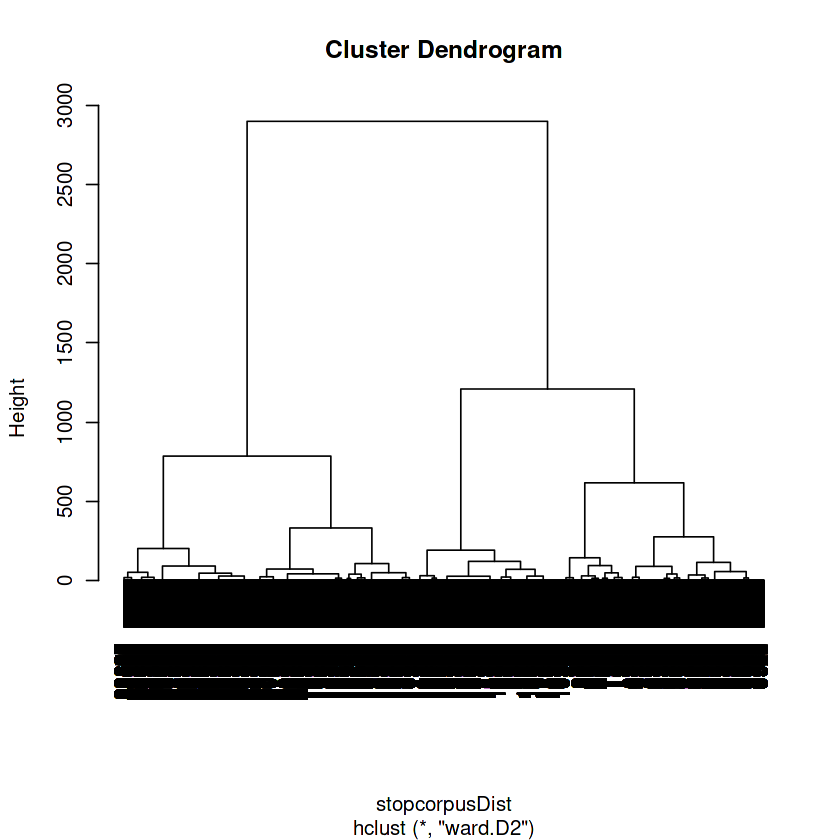

In [28]:
# Step 1: Convert the term-document matrix to a data frame
stopcorpusDF <- as.data.frame((stopcorpusDTM[[1]]))

# Step 2: Compute the Euclidean distance matrix
stopcorpusDist <- dist(stopcorpusDF)

# Step 3: Perform hierarchical clustering using the Ward.D2 method
stopcorpusHC <- hclust(stopcorpusDist, method="ward.D2")

# Step 4: Plot the hierarchical clustering dendrogram
plot(stopcorpusHC)


Let's filter the words and make dendogram more readable:

In [29]:

# Find terms that are longer than 3 characters
keepTerms <- Filter(function(x) nchar(x) > 30, Terms(stopcorpusDTM))

# Subset the DTM to keep only longer terms
filteredDTM <- stopcorpusDTM[, keepTerms]


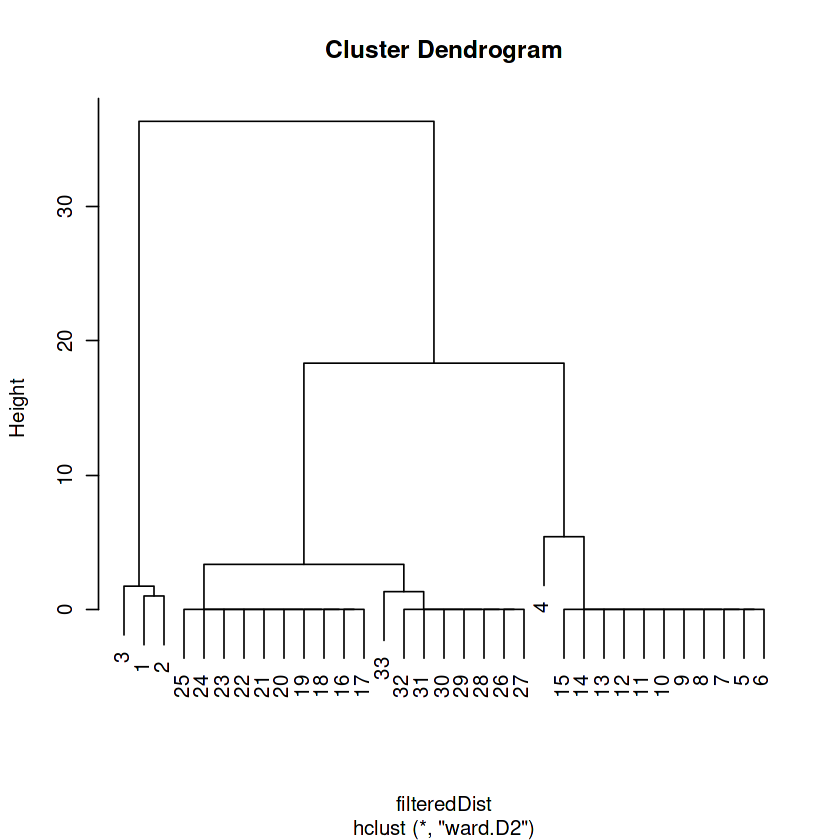

In [30]:
# Step 1: Convert the term-document matrix to a data frame
filteredDF <- as.data.frame((filteredDTM[[1]]))

# Step 2: Compute the Euclidean distance matrix
filteredDist <- dist(filteredDF)

# Step 3: Perform hierarchical clustering using the Ward.D2 method
filteredHC <- hclust(filteredDist, method="ward.D2")

# Step 4: Plot the hierarchical clustering dendrogram
plot(filteredHC)


In [31]:
stopcorpustfnew <- tm::termFreq(stopcorpus[[1]])
stopcorpustfnew

academy                 adaptasiya 
                         2                          2 
                     addım                        ala 
                         1                          1 
                    alaraq                     aləmdə 
                         1                          1 
                   alətlər                      almaq 
                         1                          1 
               alqoritmlər                   anlamağa 
                         1                          1 
                  axtarışı                 axtarışına 
                         1                          1 
                bacarıqlar            bacarıqlarınıza 
                         1                          1 
           bacarıqlarınızı                   başlamaq 
                         2                          1 
                 başlanğıc                    başlaya 
                         1                          1 
                  başlayan                başlayarkən 
                         1                          1 
                     bilər                    biləriş 
                         5                          1 
      bilərnəticəproqramçı                 bilərsiniz 
                         1                          5 
 bilərsinizproqramlaşdırma             bilərtexnoloji 
                         1                          1 
                     bilik                   biliklər 
                         1                          2 
             biliklərinizi                      bulud 
                         1                          1 
                      cari           çəkinməyinşəbəkə 
                         1                          1 
                     çətin                       code 
                         1                          1 
                codecademy                   coursera 
                         1                          1 
                      daim                      daimi 
                         1                          1 
                   davamlı                      deyil 
                         1                          1 
                   dəyərli                       dili 
                         2                          1 
                     dilin                     dillər 
                         1                          1 
                 dillərdir                    dilləri 
                         1                          4 
                 dillərini                 dillərinin 
                         3                          3 
                    diqqət                   diqqətlə 
                         1                          1 
                dünyasında                    düşüncə 
                         1                          1 
                       edə                     edəcək 
                         2                          1 
                 edəcəkilk                     edərək 
                         1                          1 
                      edin                     ediriş 
                         1                          1 
          edirözünüinkişaf                 elanlarını 
                         1                          1 
                   elmləri                  etdirərək 
                         3                          1 
                   etdirin                   etdirmək 
                         1                          2 
                etdirməkdə                       etmə 
                         1                          1 
                   etməklə                      evdən 
                         1                          1 
               əhəmiyyətli                        əla 
                         1                          4 
                  əlaqədar                       əldə 
                         1                          3 
                      əsas                əsaslanaraq 
    

In [32]:
words <- names(stopcorpustfnew)

# D.

openNLP does not support the Azerbaijani language. We have tried to translate the text but it did not make sense to us, since it is not analysis of Azerbaijani document text.

# E. Word frequency using Zipfr

In [33]:
# define all words
all_text <- unlist(sapply(clcorpus, `[`, "content"))

# tokenize the text to extract words
words <- unlist(strsplit(all_text, "\\s+"))
words <- words[words != ""]

# findind unique words
terms <- unique(words)

# Calculate the frequency 
word_frequency <- table(words)

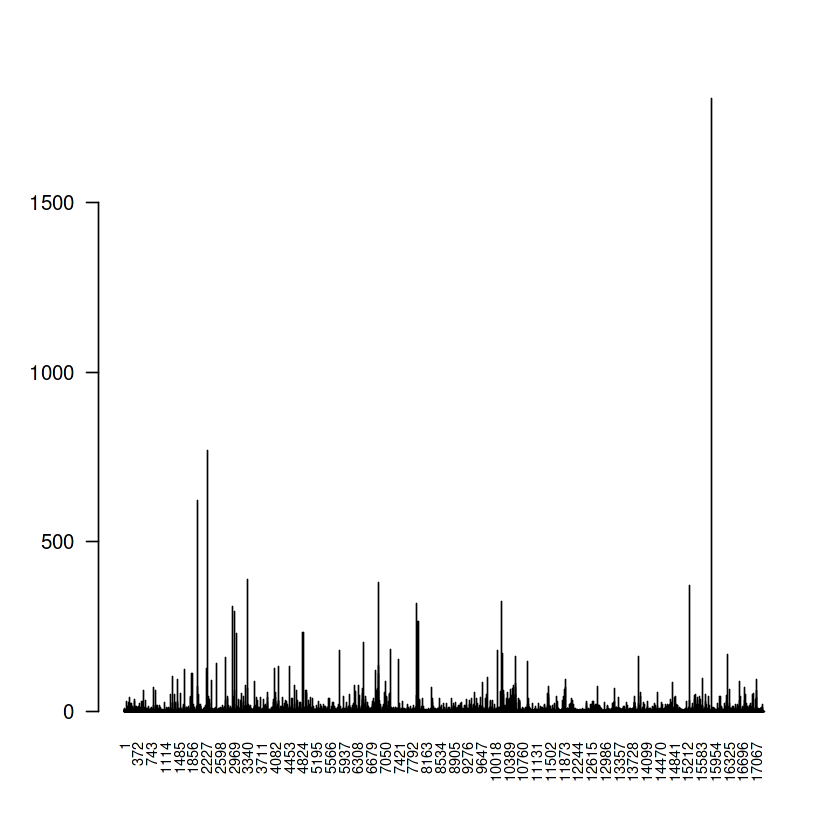

In [34]:
# Convert the table class object to a data frame
tdf <- as.data.frame(word_frequency)

# Plot the frequencies using barplot
barplot(tdf$Freq, names.arg = rownames(tdf), las = 2, cex.names = 0.7)

In [35]:
tail(tdf,10)

,words,Freq
,<fct>,<int>
17259,современник,1
17260,суд,1
17261,текущих,1
17262,тени,1
17263,ты,1
17264,хочешь,1
17265,храни,1
17266,хроника,1
17267,царя,1


**As you can see even azerbaijani vlogs contain some Russian phrases. Such cases make the analysis and understanding of the text even harder. This also emphasizes the importance of data cleaning.**

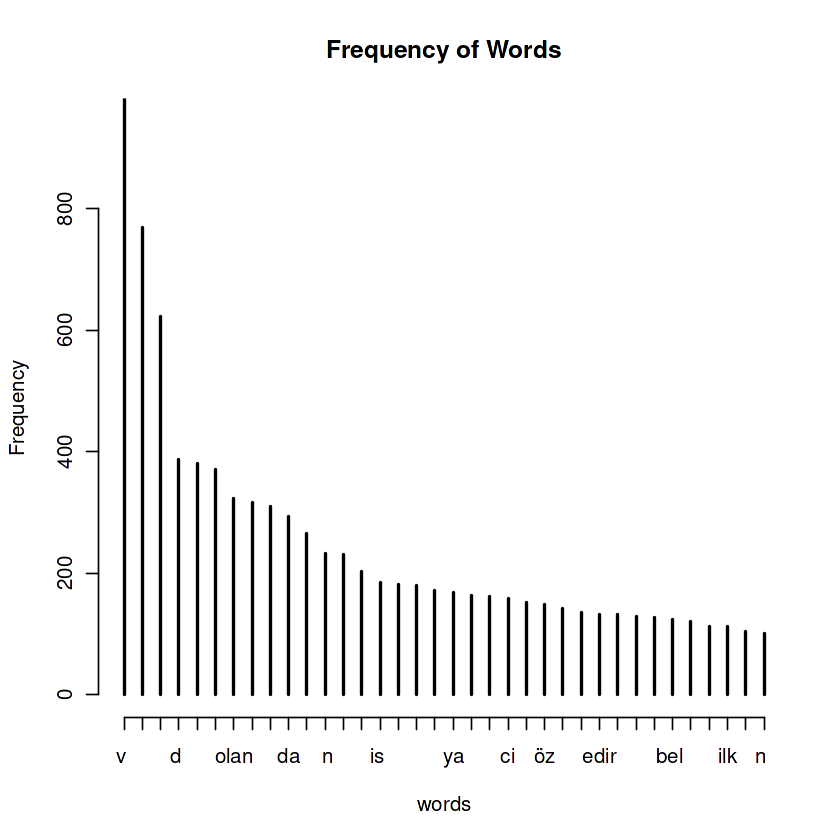

In [36]:
# Filter word frequency for words occurring less than or equal to 50 times
filtered_word_frequency <- word_frequency[word_frequency > 100]

# Identify the most frequent word
most_frequent_word <- names(filtered_word_frequency)[1]

# Determine the highest frequency
highest_frequency <- filtered_word_frequency[1]

# Plot the filtered word frequency in descending order
plot(sort(filtered_word_frequency, decreasing = TRUE), 
     ylab = "Frequency", 
     ylim = c(0, highest_frequency + 840), 
     main = "Frequency of Words")


For this visualization, we have used clean(no numbers and extra characters) but not removed stopwords. This visual clearly indicates why the stopwords has to be removed. As you can see, frequency of stop words such as "ve", "olan" and "bele" is quite high.

# F. Word Cloud and Sentiment analysis

**Let's play with some visualization settings and see if we can make a readable word clous:**

Warning message in wordcloud(words = words, freq = stopcorpustfnew, scale = c(6, :
“öyrənilməsiproqramlaşdırma could not be fit on page. It will not be plotted.”


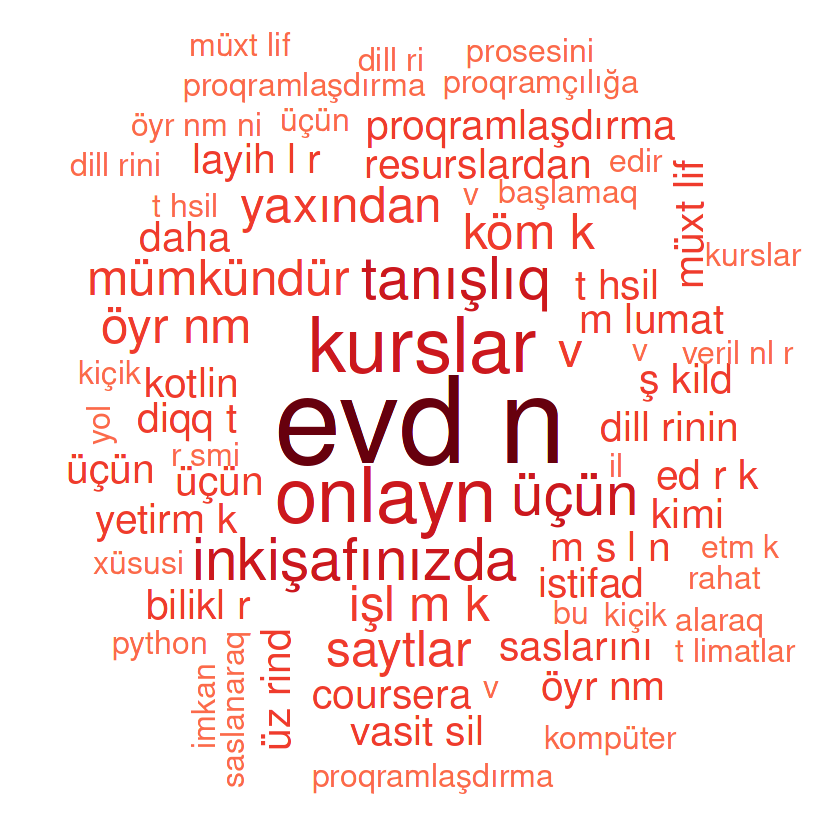

In [37]:
library(wordcloud)
library(RColorBrewer)

# Define color palette
pal <- brewer.pal(9, "Reds")

# Set up the plotting area with desired dimensions
par(mar = rep(0, 4))  # Remove margins to maximize space for the word cloud
plot.new()  # Create a new plot

# Generate the word cloud with larger font sizes and cleaner appearance
wordcloud(words = words, 
          freq = stopcorpustfnew, 
          scale = c(6, 0.7),  # Increase font sizes for words
          min.freq = 2,  # Set minimum frequency threshold for inclusion
          max.words = 100,  # Limit the number of words displayed
          random.order = FALSE,  # Display words in decreasing frequency
          colors = pal[-(1:4)])  # Use defined color palette excluding lightest colors


## B. Continue to explore tutorial

Let's apply tokenization to clean version of dataset 

In [38]:
corpustext <- stopcorpus[[5]]
corpustokens <- quanteda::tokens(corpustext$content)

In [39]:
str(corpustokens)

List of 1
 $ text1: chr [1:424] "dünyanın" "möcüzəsindən" "olantac" "mahalhindistanın" ...
 - attr(*, "types")= chr [1:339] "dünyanın" "möcüzəsindən" "olantac" "mahalhindistanın" ...
 - attr(*, "padding")= logi FALSE
 - attr(*, "class")= chr "tokens"
 - attr(*, "docvars")='data.frame':	1 obs. of  3 variables:
  ..$ docname_: chr "text1"
  ..$ docid_  : Factor w/ 1 level "text1": 1
  ..$ segid_  : int 1
 - attr(*, "meta")=List of 3
  ..$ system:List of 5
  .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. ..$ : int [1:3] 3 3 1
  .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. ..$ : int [1:3] 4 0 5
  .. ..$ system         : Named chr [1:3] "Linux" "x86_64" "root"
  .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. ..$ directory      : chr "/kaggle/working"
  .. ..$ created        : Date[1:1], format: "2024-05-05"
  ..$ object:List of 6
  .. ..$ unit        : c

Let's contruct sparse document-feature matrix:

In [40]:
corpusDFM <- quanteda::dfm(corpustokens)
str(corpusDFM)

Formal class 'dfm' [package "quanteda"] with 8 slots
  ..@ docvars :'data.frame':	1 obs. of  3 variables:
  .. ..$ docname_: chr "text1"
  .. ..$ docid_  : Factor w/ 1 level "text1": 1
  .. ..$ segid_  : int 1
  ..@ meta    :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 3 3 1
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 4 0 5
  .. .. ..$ system         : Named chr [1:3] "Linux" "x86_64" "root"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "/kaggle/working"
  .. .. ..$ created        : Date[1:1], format: "2024-05-05"
  .. ..$ object:List of 9
  .. .. ..$ unit        : chr "documents"
  .. .. ..$ what        : chr "word"
  .. .. ..$ ngram       : int 1
  .. .. ..$ skip        : int 0
  .. .. ..$ concatenator: chr "_"
  .. .. ..$ weigh

Let's check frequency of terms:

In [41]:
corpusDocFreq <-quanteda::docfreq(corpusDFM)
str(corpusDocFreq)

 Named int [1:339] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:339] "dünyanın" "möcüzəsindən" "olantac" "mahalhindistanın" ...


In [42]:
corpusDocFreq

dünyanın      möcüzəsindən           olantac  mahalhindistanın 
                1                 1                 1                 1 
        şimalında              aqra         şəhərində          yerləşir 
                1                 1                 1                 1 
        hindistan        deyildikdə           insanın            ağlına 
                1                 1                 1                 1 
            gələn          simvolik         tikilidir               tac 
                1                 1                 1                 1 
           sarayı          mənasını             verən             abidə 
                1                 1                 1                 1 
             metr        hündürlüyü             dünya      memarlığının 
                1                 1                 1                 1 
         görkəmli    nümunələrindən             hesab            olunur 
                1                 1                 1                 1 
          ziyarət            edilən            tarixi      binalarından 
                1                 1                 1                 1 
            mahal             eşqin          əzəmətin simvoludurdünyada 
                1                 1                 1                 1 
         insanlar             ikiyə           bölünür            mahalı 
                1                 1                 1                 1 
         görənlər görməyənləredvard               lir           ingilis 
                1                 1                 1                 1 
            lordu          doğrudan             gözəl            poetik 
                1                 1                 1                 1 
          binadır         görənləri     bənzərsizliyi            heyran 
                1                 1                 1                 1 
            ildən       hindistanda          müsəlman     incəsənətinin 
                1                 1                 1                 1 
           incisi           irsinin         universal               şah 
                1                 1                 1                 1 
     əsərlərindən        yuneskonun         ümumdünya            mədəni 
                1                 1                 1                 1 
              irs siyahısındadırtac           mahalın        hekayəsicü 
                1                 1                 1                 1 
            illər             uttar            pradeş        bölgəsində 
                1                 1                 1                 1 
             inşa            edilib             böyük             moğol 
                1                 1                 1                 1 
    imperiyasının          hökmdarı           cahanın             həyat 
                1                 1                 1                 1 
          yoldaşı            mümtaz        xatirəsini          yaşatmaq 
                1                 1                 1                 1 
        etdirdiyi              əsər           dünyada           sevgini 
                1                 1                 1                 1 
        simvolizə             mühüm      tikililərdən           biridir 
                1                 1                 1                 1 
        övladının             anası           sonuncu         doğulması 
                1                 1                 1                 1 
           zamanı         dünyasını           dəyişib               adı 
                1                 1                 1                 1 
         ərcümənd              banu             begüm            mənası 
                1                 1                 1                 1 
         sarayınn          seçilmiş        deməkdirci              üzrə 
                1                 1                 1                 1 
           milyon             səslə             yeddi           seç

**Since we have remove numbers and stopwords and the sparsity is high, almost all words have occured only once in the document 5.**

Let's assign some weights:

In [43]:
corpusWeights <- quanteda::dfm_weight(corpusDFM)
str(corpusWeights)

Formal class 'dfm' [package "quanteda"] with 8 slots
  ..@ docvars :'data.frame':	1 obs. of  3 variables:
  .. ..$ docname_: chr "text1"
  .. ..$ docid_  : Factor w/ 1 level "text1": 1
  .. ..$ segid_  : int 1
  ..@ meta    :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 3 3 1
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 4 0 5
  .. .. ..$ system         : Named chr [1:3] "Linux" "x86_64" "root"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "/kaggle/working"
  .. .. ..$ created        : Date[1:1], format: "2024-05-05"
  .. ..$ object:List of 9
  .. .. ..$ unit        : chr "documents"
  .. .. ..$ what        : chr "word"
  .. .. ..$ ngram       : int 1
  .. .. ..$ skip        : int 0
  .. .. ..$ concatenator: chr "_"
  .. .. ..$ weigh

Weights have been assigned, let's check it:

Let's estimate TF-IDF score:

In [44]:
corpustfidf <- quanteda::dfm_tfidf(corpusDFM, scheme_tf="count", scheme_df="inverse")
str(corpustfidf)

Formal class 'dfm' [package "quanteda"] with 8 slots
  ..@ docvars :'data.frame':	1 obs. of  3 variables:
  .. ..$ docname_: chr "text1"
  .. ..$ docid_  : Factor w/ 1 level "text1": 1
  .. ..$ segid_  : int 1
  ..@ meta    :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 3 3 1
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 4 0 5
  .. .. ..$ system         : Named chr [1:3] "Linux" "x86_64" "root"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "/kaggle/working"
  .. .. ..$ created        : Date[1:1], format: "2024-05-05"
  .. ..$ object:List of 9
  .. .. ..$ unit        : chr "documents"
  .. .. ..$ what        : chr "word"
  .. .. ..$ ngram       : int 1
  .. .. ..$ skip        : int 0
  .. .. ..$ concatenator: chr "_"
  .. .. ..$ weigh

In [45]:
corpustfidf

Document-feature matrix of: 1 document, 339 features (0.00% sparse) and 0 docvars.
       features
docs    dünyanın möcüzəsindən olantac mahalhindistanın şimalında aqra şəhərində
  text1        0            0       0                0         0    0         0
       features
docs    yerləşir hindistan deyildikdə
  text1        0         0          0
[ reached max_nfeat ... 329 more features ]

In [46]:
corpusWeights

Document-feature matrix of: 1 document, 339 features (0.00% sparse) and 0 docvars.
       features
docs    dünyanın möcüzəsindən olantac mahalhindistanın şimalında aqra şəhərində
  text1        3            2       1                1         1    1         1
       features
docs    yerləşir hindistan deyildikdə
  text1        1         3          1
[ reached max_nfeat ... 329 more features ]

In [47]:
# Convert to character vector if not already
text_content <- as.character(stopcorpus$content)

# Remove newlines and multiple spaces
preprocessed_text <- gsub("\n", " ", text_content)
preprocessed_text <- gsub("[ ]{2,}", " ", preprocessed_text)


wholecorpustokens <- quanteda::tokens(preprocessed_text)

# Create a document frequency matrix (DFM)
wholecorpusDFM <- quanteda::dfm(wholecorpustokens)

# Check if the DFM is correctly created
if (!is.matrix(wholecorpusDFM) && !inherits(wholecorpusDFM, "dfm")) {
  stop("DFM creation failed, please check the input data.")
}

# Calculate the total count of each term across all documents
term_totals <- Matrix::colSums(as.matrix(wholecorpusDFM))

# Filter terms that have a total count of more than 5
wholecorpusDFM_trimmed <- wholecorpusDFM[, term_totals > 5]

# Calculate TF-IDF on the trimmed DFM
wholecorpustfidf <- quanteda::dfm_tfidf(wholecorpusDFM_trimmed, scheme_tf = "count", scheme_df = "inverse")

# Examine the structure of the trimmed DFM
str(wholecorpustfidf)

Formal class 'dfm' [package "quanteda"] with 8 slots
  ..@ docvars :'data.frame':	50 obs. of  3 variables:
  .. ..$ docname_: chr [1:50] "text1" "text2" "text3" "text4" ...
  .. ..$ docid_  : Factor w/ 50 levels "text1","text2",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ segid_  : int [1:50] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ meta    :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 3 3 1
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 4 0 5
  .. .. ..$ system         : Named chr [1:3] "Linux" "x86_64" "root"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "/kaggle/working"
  .. .. ..$ created        : Date[1:1], format: "2024-05-05"
  .. ..$ object:List of 9
  .. .. ..$ unit        : chr "documents"
  .. .. ..$ what        : chr "word"
  .. .. ..$ ng

**Great! We have created the TF IDF for our text corpus. Initially, tokenization were not able not define and split the words. This tokenization problem created a huge bottleneck since all of the documents were considered as one word and 0 features were able to be extracted. Fixing of tokenization enabled us to create the tf idf successfully:**

In [48]:
wholecorpustfidf

Document-feature matrix of: 50 documents, 1,518 features (86.26% sparse) and 0 docvars.
       features
docs    list ( content = " \\     addım    tanış proqramlaşdırma      əsas
  text1    0 0       0 0 0  0 0.9208188 1.972732        15.37734 0.8028187
  text2    0 0       0 0 0  0 0         0                0       0.2676062
  text3    0 0       0 0 0  0 0         0                0       0.2676062
  text4    0 0       0 0 0  0 0         0                0       0        
  text5    0 0       0 0 0  0 0         0                0       0.5352125
  text6    0 0       0 0 0  0 0.9208188 0                1.39794 0.2676062
[ reached max_ndoc ... 44 more documents, reached max_nfeat ... 1,508 more features ]

#### When it comes to the results, non-filtered data showed 97% sparsity where only couple of words had non-zero tfidf scores. Therefore, we have filtered the text corpus to not include the words which appear less than determined threshold. This resulted in the sparsity of 86.3% which is acceptable considering the various topics covered through documents. 

####  The number of features was 5300 before filtering and have been reduced to 1518. This improvement in sparsity and feature count is beneficial for various analytical tasks as it enhances manageability and computational efficiency. 

In [49]:
install.packages("syuzhet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
library(syuzhet)

corpusAsString <- get_text_as_string("../input/azerbaijani-blogs/stopwords-az.txt")


Warning message in readLines(path_to_file):
“incomplete final line found on '../input/azerbaijani-blogs/stopwords-az.txt'”


### Syuzhet is successfully installed and functions such as get_text_as_string have been utilized. However, according to their documentation, all non-latin characted languages (inluding Azerbaijani), is not supported.


# G. Three additional methods in 2 libraries

### Stringi

In [51]:
library("quanteda")
library("stringi")

Package version: 3.3.1
Unicode version: 13.0
ICU version: 66.1

Parallel computing: 4 of 4 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘package:tm’:

    stopwords


The following objects are masked from ‘package:NLP’:

    meta, meta<-




In [52]:
stri_enc_isascii(corpusdf$content[5])

[1] NA

In [53]:
library("readtext")

data <- readtext(
 "/kaggle/input/azerbaijani-blogs/azerbaijani_blogs.csv"
)

#Check if a string contains only ASCII characters.
stri_enc_isascii(data$content[1])


Attaching package: ‘readtext’


The following object is masked from ‘package:quanteda’:

    texts




[1] FALSE

**As expected,our text does not only contain ASCII characters**

In [54]:
#Detect Character Set and Encoding (+ Language)
encoding <- stri_enc_detect(data$content[1], filter_angle_brackets = TRUE)
encoding

Encoding,Language,Confidence
<chr>,<chr>,<dbl>
UTF-8,,1.00
windows-1254,tr,0.23
windows-1252,it,0.11
UTF-16BE,,0.10
UTF-16LE,,0.10
GB18030,zh,0.10
Big5,zh,0.10
windows-1250,ro,0.08
KOI8-R,ru,0.01


**The stri_enc_detect function analyzed the character set and encoding of the input text and provided a ranked list of potential encodings along with their associated languages and confidence levels. The detected encoding is UTF-8 with a confidence level of 1.00, indicating high certainty that the text is encoded in UTF-8. Other potential encodings include windows-1254 (Turkish) with a confidence level of 0.23 and windows-1252 (Italian) with a confidence level of 0.11,**

In [55]:
#Function to estimate number of bytes

stri_numbytes(data$content[1])


[1] 6048

**Functions straightforwardly returns us the number of bytes in a provided text.**

### Quanteda

**Quanteda provides an easy way to select and seperate the sentences:**

In [56]:
all_sentences <- get_sentences(data$content[1])
head(all_sentences)

[1] "Proqramçılığa başlamaq üçün ilk addım bu sahənin əsasları ilə tanış olmaqdır."                                                                     
[2] "Kompüter elmləri alqoritmlər, verilənlər strukturları və proqramlaşdırma prinsipləri ilə tanışlıq proqramçı kimi inkişafınızda əsas təşkil edəcək."
[3] "Bu mərhələdə Python, JavaScript və Java kimi başlanğıc səviyyəli proqramlaşdırma dillərini öyrənmək lazımdır."                                     
[4] "Proqramlaşdırma dillərinin seçimiProqramlaşdırma dilləri kompüterlərlə işləmək üçün istifadə olunan dillərdir."                                    
[5] "Hər bir proqramlaşdırma dili xüsusi tətbiqlər və sahələr üçün yaradılmışdır."                                                                      
[6] "Məsələn, veb inkişaf üçün JavaScript, mobil tətbiqetmələr üçün Swift və ya Kotlin, məlumat elmləri üçün Python kimi dilləri öyrənmək faydalıdır."

In [57]:
# Function to return character length of a document
length <- stri_length(data$content[1])

#Function to convert text to lower and upper case
uppertext <- stri_trans_toupper(data$content[1])
#stri_trans_tolower(chapters_text)

length

[1] 5196

As preprocessing function, quanteda even has a robust text reverser:

In [58]:
reversed_string <- stri_reverse(data$content[5])
partial_reversed_string <- substr(reversed_string, start = 1, stop = 200)  # Print first 20 characters
print(partial_reversed_string)


[1] "\n  .ridirib nədrəlrey iyidte tərayiz xoç nə nirəlqişa əd nüg ub ,isədiba igves zisrənəb ub nəlikit karanalmahli nədqşE.ıdtaç aşab ədli ic-8091 irəlşi aprəb əv idrətsög sübbəşət anısaprəb ninərəbqəm no"
